Python Notebook is used because it is easier to visualize plots/graphs and write down findings.

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv(r'output/dataset.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           256 non-null    object 
 1   neg            256 non-null    float64
 2   neu            256 non-null    float64
 3   pos            256 non-null    float64
 4   compound       256 non-null    float64
 5   date           256 non-null    object 
 6   closing_price  256 non-null    float64
 7   open_price     255 non-null    float64
 8   daily_high     256 non-null    float64
 9   daily_low      256 non-null    float64
 10  past_change    256 non-null    float64
 11  future_change  256 non-null    float64
 12  day            256 non-null    int64  
 13  month          256 non-null    int64  
 14  weekday        256 non-null    int64  
dtypes: float64(10), int64(3), object(2)
memory usage: 30.1+ KB


In [30]:
df['day'] = df.day.astype('category')
df['month'] = df.month.astype('category')
df['weekday'] = df.weekday.astype('category')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Date           256 non-null    object  
 1   neg            256 non-null    float64 
 2   neu            256 non-null    float64 
 3   pos            256 non-null    float64 
 4   compound       256 non-null    float64 
 5   date           256 non-null    object  
 6   closing_price  256 non-null    float64 
 7   open_price     255 non-null    float64 
 8   daily_high     256 non-null    float64 
 9   daily_low      256 non-null    float64 
 10  past_change    256 non-null    float64 
 11  future_change  256 non-null    float64 
 12  day            256 non-null    category
 13  month          256 non-null    category
 14  weekday        256 non-null    category
dtypes: category(3), float64(10), object(2)
memory usage: 27.0+ KB


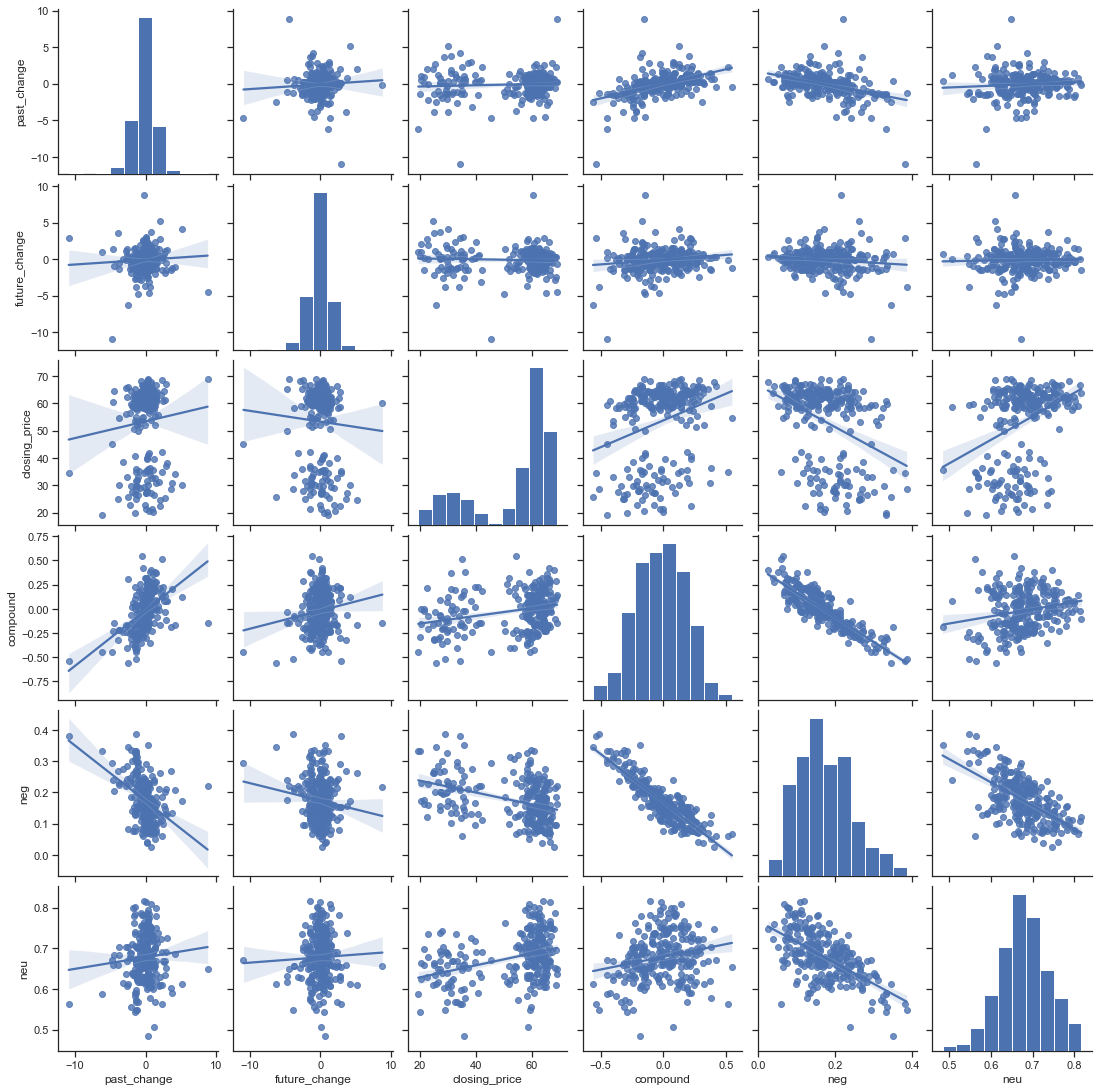

In [36]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df[['past_change','future_change','closing_price','compound', 'neg', 'neu']], kind="reg")

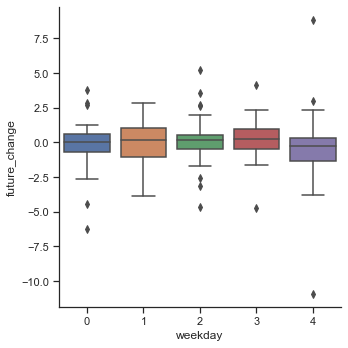

In [33]:
sns.catplot(x="weekday", y="future_change", kind="box", data=df);

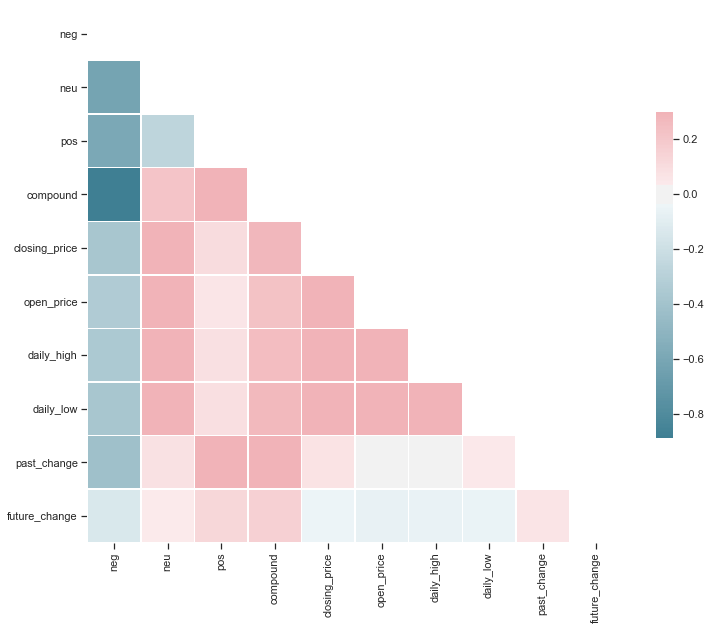

In [41]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

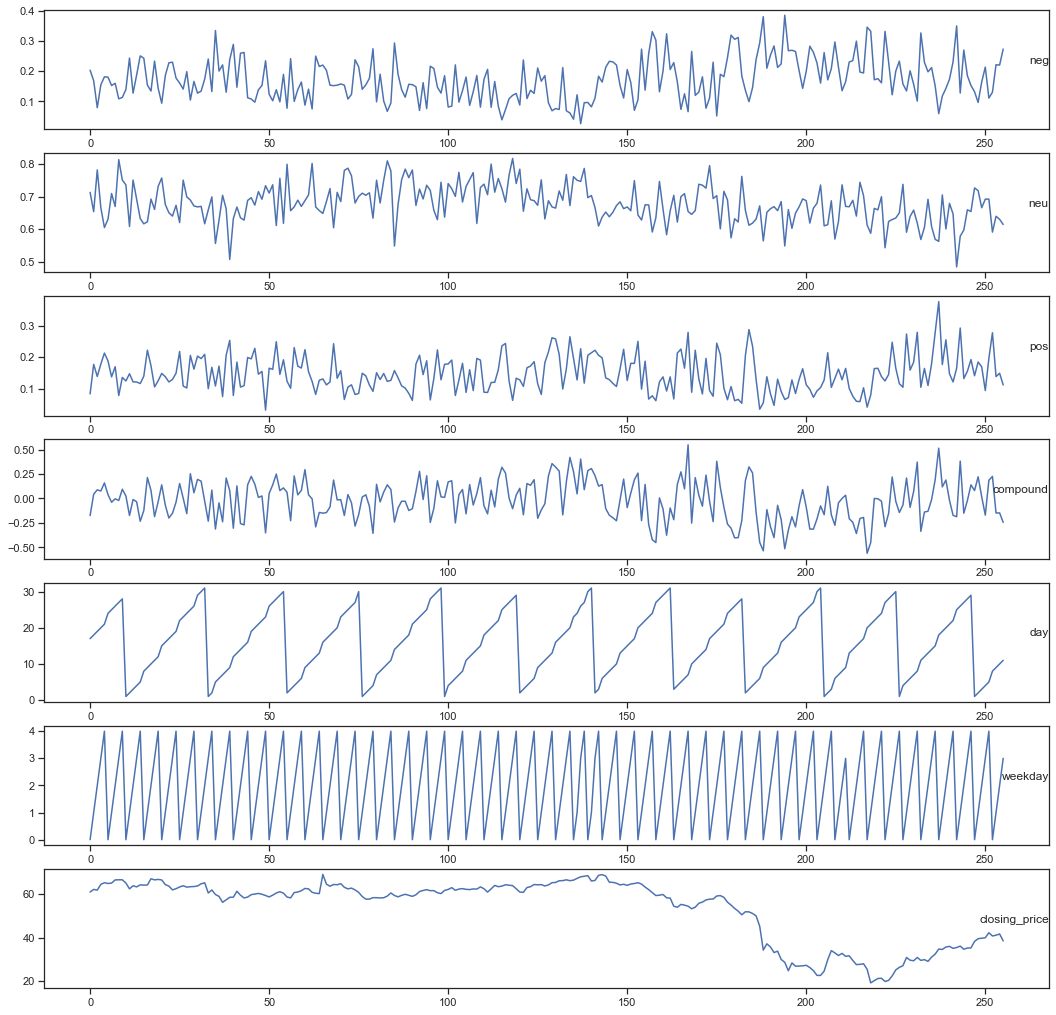

In [39]:
# specify columns to plot
groups = ['neg', 'neu', 'pos', 'compound', 'day', 'weekday', 'closing_price']
i = 1

# plot each column
plt.figure(figsize=(18, 18))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(df[group])
	plt.title(group, y=0.5, loc='right')
	i += 1
plt.show()